# Reverse Engineer Ranged Dot Plot

The following code prepares the Seattle weather data frame for you.  There is not need to change it.

In [28]:
import altair as alt
import pandas as pd
from vega_datasets import data

source = data.seattle_weather()
source.date = pd.to_datetime(source.date)
source = source[source.date < pd.to_datetime("2013")] # Focus on 2012.
print(source.describe())
source.head()

       precipitation    temp_max    temp_min       wind
count     366.000000  366.000000  366.000000  366.00000
mean        3.349727   15.276776    7.289617    3.40082
std         6.489464    7.079976    4.697443    1.45605
min         0.000000   -1.100000   -3.300000    1.00000
25%         0.000000    9.025000    3.300000    2.30000
50%         0.000000   14.700000    7.200000    3.05000
75%         4.025000   21.100000   11.100000    4.27500
max        54.100000   34.400000   18.300000    9.50000


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


Please use the following cell to generate the desired ranged dot plot

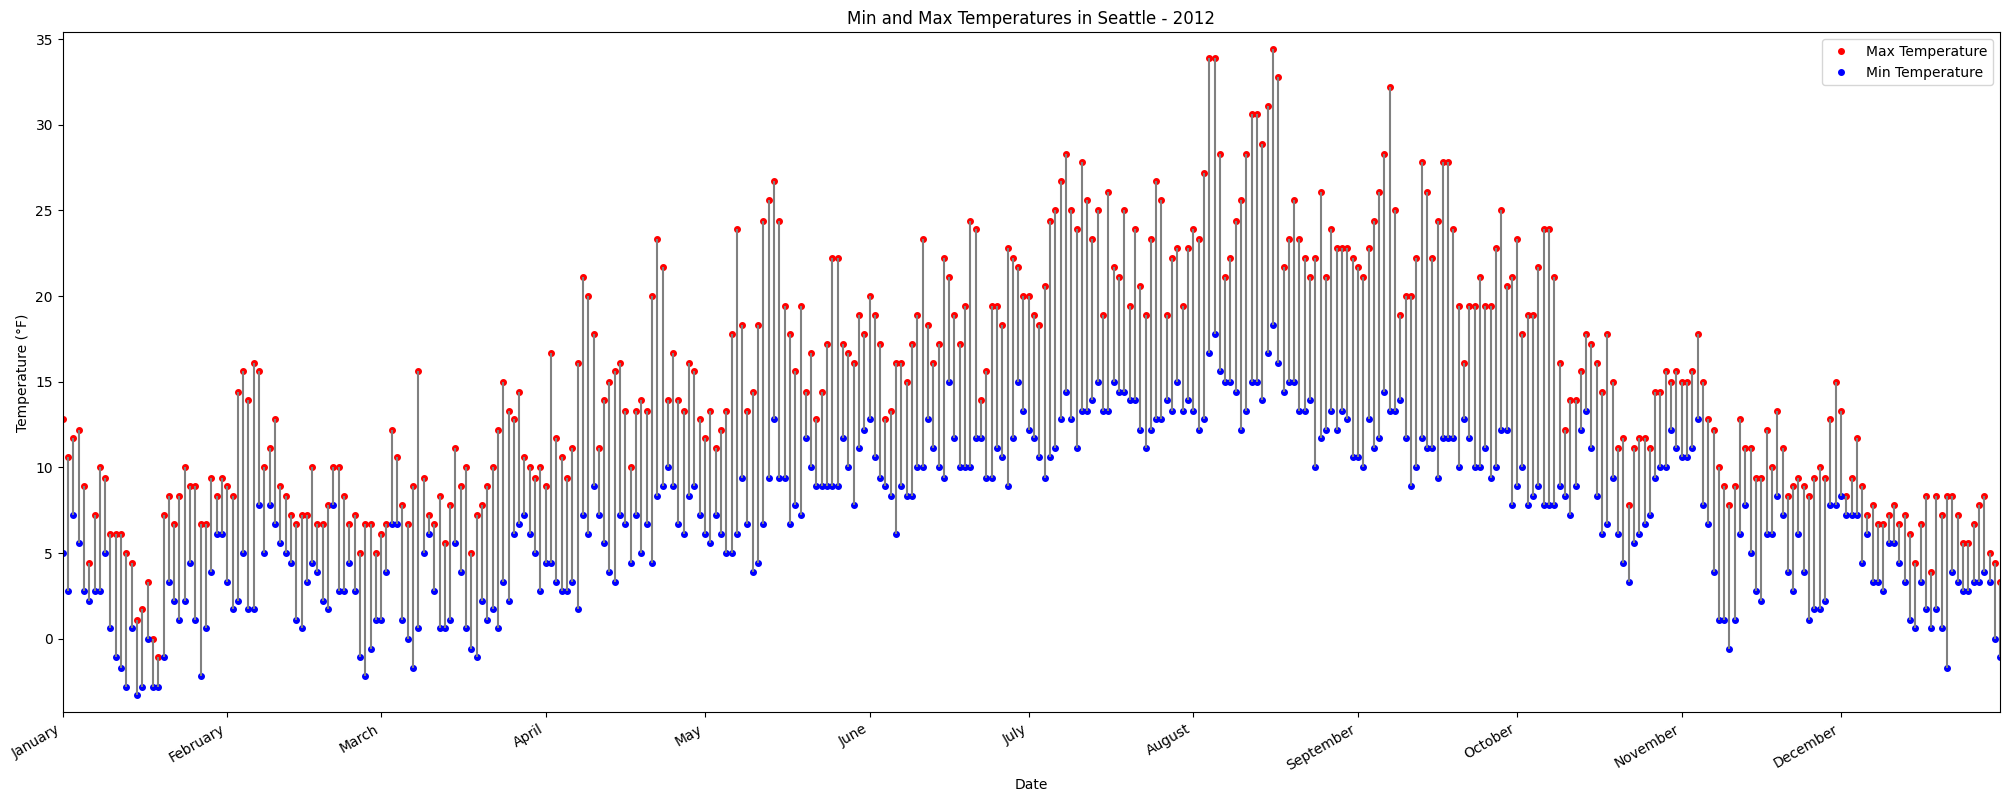

In [34]:
base = alt.Chart(source).properties(width=1024, height=800)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert 'DATE' to a datetime 
source['date'] = pd.to_datetime(source['date'])

# Create the plot
plt.figure(figsize=(25,10))

# Plot max temperatures as red dots
plt.plot(source['date'], source['temp_max'], 'ro', markersize=4, label='Max Temperature')

# Plot min temperatures as blue dots
plt.plot(source['date'], source['temp_min'], 'bo', markersize=4, label='Min Temperature')

# Plot vertical lines between min and max temperatures for each day
plt.vlines(source['date'], source['temp_min'], source['temp_max'], color="grey", linestyles='solid')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.title('Min and Max Temperatures in Seattle - 2012')

# Format x-axis to show months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Format ticks as full month names

# Improve date formatting on x-axis
plt.gcf().autofmt_xdate()

# Set the x-axis limits to cover the full year
plt.xlim([source['date'].min(), source['date'].max()])

# Set the y-axis limits (adjust as needed, or use plt.ylim(min, max))
plt.ylim(source['temp_min'].min()-1, source['temp_max'].max()+1)

# Save the figure as a PNG file
plt.savefig('HW2_Plot.png', dpi=300)

# Add a legend
plt.legend()

# Display the plot
plt.show()
